# <font color='red'>Projeto 2 - Teste AB</font>

## Grupo: Cauê Citrini, Eduardo Gebara, Gabriel Noal e Rene Martinez

___
### Introdução

O projeto consiste em analizar as técnicas inferenciais adequadas para analizar duas amostras de tempo coletadas pelo teste realizado no site portifólio dos integrantes do grupo, na primeira versão do teste o botão de retorno a página inicial é um link e na outra versão uma imagem, dessa forma testaremos em qual dos casos os usuários levariam menos tempo para retornar a página inicial.

### Versão Link

<img src="botao.png">

### Versão Imagem

<img src="imagem.png">


In [4]:
import numpy as np
import pandas as pd
import json
import itertools
import matplotlib.pyplot as plt
import numpy.random as rnd
from scipy.stats import norm, t
%matplotlib inline

___
### Técnica Inferencial

Inicialmente, vamos analisar qual é a melhor técnica inferencial para nosso projeto. Para isso, vamos gerar dois conjuntos de dados ficticios que simulam os dados que obteremos pelo teste AB realizado no site. A partir dos dados elaboraremos o teste de hipóteses capaz de averiguar qual dos modelos de site é o mais eficiente para o usuário. 

In [5]:
#Amostra do teste A
n1=50
data1 = norm.rvs(20,4, size=n1)
mu1=np.mean(data1)
S1=np.var(data1)**0.5

In [6]:
#Amostra do teste B
n2=50
data2 = norm.rvs(22,4, size=n2)
mu2=np.mean(data2)
S2=np.var(data2)**0.5

Em nosso teste as amostras são independentes, já que pessoas distintas são submetidas a apenas um dos testes dessa forma o resultado de um não condiciona o resultado do outro. Podemos afirmar também que as variâncias são desconhecidas ja que nenhum teste anterior foi realizado e não possuimos quaisquer outra evidência que informe esse parâmetro. Por conta disso, estimaremos as variâncias a partir de S1 e S2.

Por conta disso, utilizaremos o teste t-Student ideal para esse tipo de comparação de duas médias.
___
As hipoteses sobre a média de tempo para a realização da tafera nos testes A e B são:

#### H nula: μa = μb

#### H alternativa: μa > μb

Adotamos o valor de 5% como nível de siginificância para nosso teste e como se trata de um teste unilateral, podemos demonstrar a região crítica pelo intervalo:

#### RC = {T > tc}

Onde tc é o valor crítico. Portanto rejeitaremos a hipotese nula caso o valor obtido pelo teste pertencer a região crítica.

Realizando o teste para verificar a Hipotese nula temos:

In [7]:
#Teste T-Student
mu3 = mu1-mu2

#Distribuição T
T=mu3/((S1**2/n1)+(S2**2/n2))**0.5

#Grau de liberdade
v1 = ((S1**2/n1)+(S2**2/n2))**2 
v2 = ((S1**2/n1)**2)/(n1-1)
v3 = ((S2**2/n2)**2)/(n2-1)

v = v1/(v2+v3)
print("O grau de liberdade é: {0}".format(int(v)))
print("O valor T é: {0}".format(T))

tc = 1.658

if T>tc:
    print("A hipotese nula foi rejeitada")

else:
    print("A hipotese nula não foi rejeitada")

O grau de liberdade é: 96
O valor T é: -2.446204254486016
A hipotese nula não foi rejeitada


___
### Análise dos dados reais

Mantendo o método descrito na técnica inferencial, realizaremos o teste de hipotese:

#### H nula: μa = μb

#### H alternativa: μa > μb

Adotamos o valor de 5% como nível de siginificância para nosso teste e como se trata de um teste unilateral, podemos demonstrar a região crítica pelo intervalo:

#### RC = {T > tc}

Este tc equivale a 45764.78 milisegundos.

In [8]:
arquivo = open("projeto-2-teste-ab-export.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

In [9]:
for k,v in dados_fire["projeto-2-teste-ab"].items():
    # print(k,v) # habilite para imprimir as chaves de mais alto nível
    for chave, valor in v.items():
        # print(chave, valor) # habilite para imprimir as chaves inferiores
        pass # desabilite quando reabilitar a linha de cima

In [10]:
lista_dicionarios = []

for k,v in dados_fire["projeto-2-teste-ab"].items():
    lista_dicionarios.append(v)
    
dataframe = pd.DataFrame.from_records(lista_dicionarios)
dataframe

,tempo,user_id,versao
0,7907,1960282978,Imagem
1,26476,984025379,Link
2,77803,2310541718,Link
3,4301,1561760900,Link
4,19744,1355150594,Link
5,49136,2819112231,Link
6,6211,4187013443,Imagem
7,8344,1960282978,Imagem
8,21711,3972734244,Link
9,7191,1716522617,Link


## Comparação dos Histogramas


(array([ 5.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   6211. ,   22671.6,   39132.2,   55592.8,   72053.4,   88514. ,
         104974.6,  121435.2,  137895.8,  154356.4,  170817. ]),
 <a list of 10 Patch objects>)

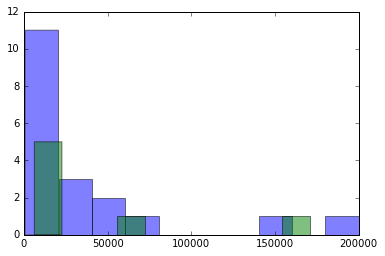

In [18]:
tempos_A = list(dataframe[dataframe.versao=="Link"].tempo)
tempos_B = list(dataframe[dataframe.versao=="Imagem"].tempo)

plt.hist(tempos_A, bins=10, alpha=0.5)
plt.hist(tempos_B, bins=10, alpha=0.5)

In [19]:
mu1=np.mean(tempos_A)
S1=np.var(tempos_A)**0.5
n1=len(tempos_A)

mu2=np.mean(tempos_B)
S2=np.var(tempos_B)**0.5
n2=len(tempos_B)

#Teste T-Student
mu3 = mu1-mu2

#Distribuição T
denominador_t = ((S1**2/n1)+(S2**2/n2))**0.5 #Raiz da soma dos desvios padrões dividido pela raiz do numero de amostras
T=mu3/denominador_t

#Grau de liberdade
v1 = ((S1**2/n1)+(S2**2/n2))**2 
v2 = ((S1**2/n1)**2)/(n1-1)
v3 = ((S2**2/n2)**2)/(n2-1)

v = v1/(v2+v3)
print("Grau de liberdade: {0}".format(int(v)))
print("Valor T: {0}".format(T))

tc = 1.833 #a partir de um nivel de significancia de 5% e um grau de liberade = 9 , olhamos em uma tabela t para ver o valor correspondente

if T>tc:
    print("A hipotese nula foi rejeitada")

else:
    print("A hipotese nula não foi rejeitada")
    

Grau de liberdade: 9
Valor T: -0.10571869317899174
A hipotese nula não foi rejeitada


### Conclusão

In [13]:
x_barra = tc*denominador_t
print("Valor da média do teste A: {0}".format(mu1))
print("Valor tc em milisegundos: {0}".format(x_barra))

Valor da média do teste A: 37565.0
Valor da média do teste B: 40117.28571428572
Valor tc em milisegundos: 44252.71987012598


Realizando a compração entre a média do Teste A e o valor equivalente ao tc em milisengundos podemos enxergar novamente que para um grau de significância de 5% a hipótese nula não pode ser rejeitada. Na hipótese nula, admitimos que as médias das amostras A e B são iguais e a partir disso, pudemos calcular o valor de T e o grau de liberdade corigido (v).
A partir do resultado do nosso teste de hipóteses, podemos afirmar que as médias de tempo nas versões A e B são aproximadamente iguais (considerando um nivel de significancia de 5%) e dessa forma, não se pode afirmar que uma versão é mais eficiente que a outra. Vale ressaltar que, talvez, pelo fato de termos um n1 e n2 pequenos, nosso teste pode não condizer muito com a realidade.